# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st




## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')


## Preparar los datos

Realizaremos una exploración de cada DataFrame, utilizando em método **(.info)** de esta manera tendremos a primera vista, como están las columnas de cada tabla, si hay valores ausentes, la calidad de la escritura de los nombres de las columnas, y así mismo, podremos ir comparando entre tablas, y determinar si tienen columnas en común para futuras concatenaciones. Con este método prodremos ver con que tipos de datos cuentan las tablas. Posteriormente haremos una visualización de los datos, usando el método **(.sample)** para mostrar aleatoriamente campos a lo largo de las tablas, utilizando una muestra de 10 filas. En caso de requerir, se corregirá datos que cuenten con escritura no adecuada, se reemplazará valores ausentes y se corregirá nombre de las columnas para los siguientes análisis.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La información de planes es la correcta, no contamos con información vacía, adicional, en caso de este DataFrame usamos el método **(.head)** ya que vemos que cuenta solo con 2 filas para la visualización de los datos, no se necesita una muestra mayor. Los datos determinados para estos planes, son los que están registrados en la tabla. Los campos señalados como flotantes, tienen 2 decimales.

## Corregir datos

No hay datos que corregir.

## Enriquecer los datos

In [5]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024 
df_plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Se agrega el campo **gb_per_month_included** para contar con los gigas del plan y poder hacer futuras operaciones.

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
df_users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
308,1308,Samara,Monroe,46,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-11-22,surf,NaN
77,1077,Chau,Webster,23,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,ultimate,NaN
382,1382,Luci,Kidd,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-06-22,ultimate,NaN
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,NaN
451,1451,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10
335,1335,Gail,Coleman,61,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-02,surf,NaN
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,NaN
312,1312,Kory,Emerson,42,"Fresno, CA MSA",2018-01-26,surf,NaN
139,1139,Thomas,Lawson,66,"New Orleans-Metairie, LA MSA",2018-11-18,surf,NaN
122,1122,Lashay,Reese,57,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-04,surf,NaN


Contamos con datos faltantes en la columna **churn_date**, así como vemos que el nombre de la columna **plan** es diferente al campo de la tabla **df_plans**. El formato de fecha en **reg_date** es de tipo objet, por lo que debemos transformarles a formato datetime.

### Corregir los datos

In [8]:
df_users = df_users.rename(columns={'plan': 'plan_name'})
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
446,1446,Pasquale,Ball,52,"Austin-Round Rock-Georgetown, TX MSA",2018-09-10,surf,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN
332,1332,Lucas,Saunders,37,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-12,surf,NaN
260,1260,Alia,Aguilar,36,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-02,surf,NaN
460,1460,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,NaN
153,1153,Kathaleen,Crawford,30,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-19,surf,NaN
470,1470,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,NaN
408,1408,Alaine,Robertson,40,"Baltimore-Columbia-Towson, MD MSA",2018-01-11,surf,NaN
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
131,1131,Shane,Morrison,60,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-07,surf,NaN


In [9]:
df_users['churn_date'] = df_users['churn_date'].fillna('Activo')
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
443,1443,Genaro,Quinn,58,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-11,surf,Activo
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Activo
165,1165,Nigel,Huber,20,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-10-27,surf,Activo
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,Activo
148,1148,Dwana,Moore,67,"Columbia, SC MSA",2018-11-04,surf,Activo
370,1370,Nenita,Vasquez,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-09-12,ultimate,Activo
147,1147,Duncan,Malone,71,"Urban Honolulu, HI MSA",2018-04-30,surf,Activo
256,1256,Johnny,Wise,53,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-11,surf,Activo
263,1263,Lucio,Duffy,39,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,surf,Activo
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,Activo


In [10]:
datetime_reg_date = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['reg_date'] = datetime_reg_date

In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Realizamos un renombre de la columna **plan** para contar con un nombre estadarizado entre los DataFrame **df_users** y **df_plan** utilizando el método **(.rename, con el parámetro column)**, así mismo remplazamos los valores ausentes del DataFrame **df_users** en la columna **churn_date** con el método **(.fillna)** se reemplazó con la palabra Activo ya que conocemos que a la fecha del reporte, no contaban con fecha de salida del plan. Realizamos una corrección del tipo de dato en la columna **reg_date**, y se utiliza el formato de acuerdo a la **ISO 8601 año de 4 digitos - mes de 2 dígitos - día de 2 dígitos**

### Enriquecer los datos

In [12]:
df_users['month'] = df_users['reg_date'].dt.month
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month
452,1452,Miguel,Sparks,32,"Tucson, AZ MSA",2018-12-29,surf,Activo,12
429,1429,Arianna,Rowe,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-22,surf,Activo,12
213,1213,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,Activo,11
64,1064,Gerardo,Ashley,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-03,surf,Activo,6
398,1398,German,Thompson,30,"Denver-Aurora-Lakewood, CO MSA",2018-10-22,surf,Activo,10
127,1127,Marchelle,Brock,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,Activo,6
389,1389,Earleen,Glass,18,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-05-06,ultimate,Activo,5
219,1219,Gavin,Keller,51,"Detroit-Warren-Dearborn, MI MSA",2018-05-14,surf,Activo,5
323,1323,Pamelia,Atkins,42,"Baltimore-Columbia-Towson, MD MSA",2018-12-30,surf,Activo,12
276,1276,Karmen,Carney,20,"Phoenix-Mesa-Chandler, AZ MSA",2018-02-14,surf,Activo,2


Se agrega un campo adicional, mostrando el mes de la fecha del registro, nombrado **month** para los futuros análisis y concatenaciones.

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)


,id,user_id,call_date,duration
61423,1222_70,1222,2018-08-06,9.97
26536,1100_93,1100,2018-08-26,3.39
6205,1029_369,1029,2018-11-12,0.94
415,1003_25,1003,2018-12-21,4.59
114739,1401_614,1401,2018-09-01,16.30
2095,1009_517,1009,2018-08-31,7.40
124838,1440_354,1440,2018-08-21,5.50
110111,1389_133,1389,2018-07-25,2.74
57683,1208_65,1208,2018-12-23,20.88
39064,1145_311,1145,2018-12-02,9.13


Vemos que los flotates poseen 2 decimales, así también el **id** si bien es número, tiene un guión bajo, por lo que está descrito como objet, para los fines respectivos es correcto, ya que es un identificador de una acción, mas no se realizará operaciones sobre este valor. A diferencia de la fecha de la llamada, ya que vemos que es un objet, por lo tanto debemos transformalo a tipo datetime.

### Corregir los datos

In [15]:
datetime_call_date = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['call_date'] = datetime_call_date


In [16]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Se corrige el tipo de dato en la columna **call_date** con el método **(.to_datetime)** y se utiliza el formato de acuerdo a la ISO 8601 **año de 4 digitos - mes de 2 dígitos - día de 2 dígitos**

### Enriquecer los datos

In [17]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.sample(10)

,id,user_id,call_date,duration,month
65296,1236_597,1236,2018-12-29,3.36,12
80169,1288_104,1288,2018-12-06,11.25,12
110882,1390_331,1390,2018-12-30,0.00,12
134260,1488_421,1488,2018-07-08,0.00,7
1416,1008_57,1008,2018-10-22,0.27,10
118086,1412_370,1412,2018-07-01,4.69,7
100782,1359_672,1359,2018-09-15,16.53,9
51284,1185_322,1185,2018-10-13,3.38,10
78766,1281_554,1281,2018-08-12,6.32,8
123986,1438_34,1438,2018-11-10,14.07,11


Se agrega un campo adicional, mostrando el mes de la fecha de la llamada, nombrado **month** para los futuros análisis y concatenaciones.

## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(10)


,id,user_id,message_date
22636,1134_39,1134,2018-11-27
60666,1382_300,1382,2018-12-18
72012,1467_344,1467,2018-11-20
58927,1374_101,1374,2018-11-12
50890,1331_65,1331,2018-12-24
18281,1120_28,1120,2018-11-01
53939,1343_20,1343,2018-09-21
7986,1060_322,1060,2018-12-02
18991,1123_60,1123,2018-09-10
72724,1470_352,1470,2018-09-10


El **id** si bien es número, tiene un guión bajo por lo que esta descrito como objet, para los fines respectivos es correcto, ya que es un identificador de acción, mas no se realizará operaciones sobre este campo. A diferencia de la fecha del envío del mensaje, ya que vemos que es un objet, por lo tanto debemos transformalo a tipo datetime.

### Corregir los datos

In [20]:
datetime_messages_date = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['message_date'] = datetime_messages_date

In [21]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Se corrige el tipo de dato en la columna **message_date** con el método **(.to_datetime)** y se utiliza el formato de acuerdo a la ISO 8601 **año de 4 digitos - mes de 2 dígitos - día de 2 dígitos**

### Enriquecer los datos

In [22]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.sample(10)

,id,user_id,message_date,month
64485,1412_67,1412,2018-11-07,11
34787,1222_0,1222,2018-12-05,12
75498,1491_358,1491,2018-05-04,5
27902,1172_359,1172,2018-09-26,9
64821,1414_37,1414,2018-10-19,10
68105,1439_499,1439,2018-09-10,9
71611,1466_263,1466,2018-06-23,6
26613,1160_126,1160,2018-08-06,8
57195,1362_267,1362,2018-06-04,6
68540,1444_23,1444,2018-10-07,10


Se agrega un campo adicional, mostrando el mes de la fecha del envío del mensaje, nombrado **month** para los futuros análisis y concatenaciones.

## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(10)


,id,user_id,session_date,mb_used
10917,1054_456,1054,2018-05-20,8.48
15053,1068_169,1068,2018-10-30,540.80
8831,1046_116,1046,2018-11-18,727.26
17858,1080_189,1080,2018-12-11,466.26
4166,1026_170,1026,2018-07-29,718.94
9317,1048_257,1048,2018-09-11,85.55
2164,1010_347,1010,2018-09-22,65.59
31855,1144_611,1144,2018-06-23,487.75
88252,1407_78,1407,2018-12-20,855.06
65578,1302_124,1302,2018-12-10,463.55


Los datos flotates poseen 2 decimales, así también el **id** si bien es número, tiene un guión bajo por lo que esta descrito como objet, para los fines respectivos es correcto, ya que es un identificador de acción, mas no se realizará operaciones sobre esto. A diferencia de la fecha de la sesión, ya que vemos que es un objet, por lo tanto debemos transformalo a tipo datetime.

### Corregir los datos

In [25]:
datetime_internet_date = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['session_date'] = datetime_internet_date

In [26]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Se corrige el tipo de dato en la columna **session_date** con el método **(.to_datetime)** y se utiliza el formato de acuerdo a la ISO 8601 **año de 4 digitos - mes de 2 dígitos - día de 2 dígitos**

### Enriquecer los datos

In [27]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['gb_used'] = df_internet['mb_used']/1024
df_internet.sample(10)

,id,user_id,session_date,mb_used,month,gb_used
70771,1331_22,1331,2018-10-31,114.21,10,0.111533
39191,1176_12,1176,2018-12-21,361.30,12,0.352832
63391,1292_95,1292,2018-09-11,417.49,9,0.407705
22105,1100_309,1100,2018-08-14,398.01,8,0.388682
82861,1387_77,1387,2018-09-02,434.39,9,0.424209
99172,1467_309,1467,2018-12-14,604.97,12,0.590791
1798,1009_333,1009,2018-09-28,776.88,9,0.758672
67862,1316_90,1316,2018-12-17,481.72,12,0.470430
7020,1039_295,1039,2018-11-28,235.02,11,0.229512
104488,1498_566,1498,2018-03-24,342.52,3,0.334492


Se agrega un campo adicional, mostrando el mes de la fecha de la sesión, nombrado **month** para los futuros análisis y concatenaciones. Adicional como los costos de los planes son en GigaBytes, se agrega el campo en Gigas.

## Estudiar las condiciones de las tarifas

In [28]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

call_user_month = df_calls.groupby(['user_id', 'month']) ['id'].count().reset_index(name="numer_calls")
call_user_month.head(10)

,user_id,month,numer_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_user_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name="minutes")
minutes_user_month.head(10)



,user_id,month,minutes
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
5,1001,12,392.93
6,1002,10,54.13
7,1002,11,359.76
8,1002,12,363.24
9,1003,12,1041.00


In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_user_month = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index(name="number_message")
messages_user_month.head(10)

,user_id,month,number_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
trafic_user_month = df_internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name="gb")
trafic_user_month.head(10)


,user_id,month,gb
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
5,1001,12,18.915215
6,1002,10,6.398447
7,1002,11,18.891680
8,1002,12,14.058828
9,1003,12,26.410293


In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
management0_df = call_user_month.merge(minutes_user_month, on=['user_id','month'], how='outer')
management1_df = management0_df.merge(messages_user_month, on=['user_id','month'], how='outer')
management_df = management1_df.merge(trafic_user_month, on=['user_id','month'], how='outer')
management_df.head(10)


,user_id,month,numer_calls,minutes,number_message,gb
0,1000,12,16.0,116.83,11.0,1.856904
1,1001,8,27.0,171.14,30.0,6.756982
2,1001,9,49.0,297.69,44.0,13.002754
3,1001,10,65.0,374.11,53.0,21.807119
4,1001,11,64.0,404.59,36.0,18.070605
5,1001,12,56.0,392.93,44.0,18.915215
6,1002,10,11.0,54.13,15.0,6.398447
7,1002,11,55.0,359.76,32.0,18.891680
8,1002,12,47.0,363.24,41.0,14.058828
9,1003,12,149.0,1041.00,50.0,26.410293


In [34]:
# Añade la información de la tarifa
management_plans0_df = management_df.merge(df_users[['user_id', 'plan_name']], on='user_id', how='left')
management_plans_df = management_plans0_df.merge(df_plans, on='plan_name', how='left')
management_plans_df.head(10)


,user_id,month,numer_calls,minutes,number_message,gb,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16.0,116.83,11.0,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,8,27.0,171.14,30.0,6.756982,surf,50,15360,500,20,10,0.03,0.03,15.0
2,1001,9,49.0,297.69,44.0,13.002754,surf,50,15360,500,20,10,0.03,0.03,15.0
3,1001,10,65.0,374.11,53.0,21.807119,surf,50,15360,500,20,10,0.03,0.03,15.0
4,1001,11,64.0,404.59,36.0,18.070605,surf,50,15360,500,20,10,0.03,0.03,15.0
5,1001,12,56.0,392.93,44.0,18.915215,surf,50,15360,500,20,10,0.03,0.03,15.0
6,1002,10,11.0,54.13,15.0,6.398447,surf,50,15360,500,20,10,0.03,0.03,15.0
7,1002,11,55.0,359.76,32.0,18.891680,surf,50,15360,500,20,10,0.03,0.03,15.0
8,1002,12,47.0,363.24,41.0,14.058828,surf,50,15360,500,20,10,0.03,0.03,15.0
9,1003,12,149.0,1041.00,50.0,26.410293,surf,50,15360,500,20,10,0.03,0.03,15.0


In [35]:
# Calcula el ingreso mensual para cada usuario
management_plans_df['additional_minutes'] = np.where(
    management_plans_df['minutes'] > management_plans_df['minutes_included'],
    management_plans_df['minutes'] - management_plans_df['minutes_included'],
    0)
management_plans_df['additional_sms'] = np.where(
    management_plans_df['number_message'] > management_plans_df['messages_included'],
    management_plans_df['number_message'] - management_plans_df['messages_included'],
    0)
management_plans_df['additional_gb'] = np.where(
    management_plans_df['gb'] > management_plans_df['gb_per_month_included'],
    management_plans_df['gb'] - management_plans_df['gb_per_month_included'],
    0)

In [36]:
management_plans_df['cost_additional_minutes'] = np.where(
    management_plans_df['additional_minutes'] > 0,
    management_plans_df['additional_minutes'] * management_plans_df['usd_per_minute'],
    0)
management_plans_df['cost_additional_sms'] = np.where(
    management_plans_df['additional_sms'] > 0,
    management_plans_df['additional_sms'] * management_plans_df['usd_per_message'],
    0)
management_plans_df['cost_additional_gb'] = np.where(
    management_plans_df['additional_gb'] > 0,
    management_plans_df['additional_gb'] * management_plans_df['usd_per_gb'],
    0)

In [37]:
management_plans_df['monthly_income'] = management_plans_df['usd_monthly_pay'] + management_plans_df['cost_additional_minutes'] + management_plans_df['cost_additional_sms'] + management_plans_df['cost_additional_gb']
management_plans_df.head(10)

,user_id,month,numer_calls,minutes,number_message,gb,plan_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,gb_per_month_included,additional_minutes,additional_sms,additional_gb,cost_additional_minutes,cost_additional_sms,cost_additional_gb,monthly_income
0,1000,12,16.0,116.83,11.0,1.856904,ultimate,1000,30720,3000,...,0.01,0.01,30.0,0.0,0.0,0.000000,0.00,0.00,0.000000,70.000000
1,1001,8,27.0,171.14,30.0,6.756982,surf,50,15360,500,...,0.03,0.03,15.0,0.0,0.0,0.000000,0.00,0.00,0.000000,20.000000
2,1001,9,49.0,297.69,44.0,13.002754,surf,50,15360,500,...,0.03,0.03,15.0,0.0,0.0,0.000000,0.00,0.00,0.000000,20.000000
3,1001,10,65.0,374.11,53.0,21.807119,surf,50,15360,500,...,0.03,0.03,15.0,0.0,3.0,6.807119,0.00,0.09,68.071191,88.161191
4,1001,11,64.0,404.59,36.0,18.070605,surf,50,15360,500,...,0.03,0.03,15.0,0.0,0.0,3.070605,0.00,0.00,30.706055,50.706055
5,1001,12,56.0,392.93,44.0,18.915215,surf,50,15360,500,...,0.03,0.03,15.0,0.0,0.0,3.915215,0.00,0.00,39.152148,59.152148
6,1002,10,11.0,54.13,15.0,6.398447,surf,50,15360,500,...,0.03,0.03,15.0,0.0,0.0,0.000000,0.00,0.00,0.000000,20.000000
7,1002,11,55.0,359.76,32.0,18.891680,surf,50,15360,500,...,0.03,0.03,15.0,0.0,0.0,3.891680,0.00,0.00,38.916797,58.916797
8,1002,12,47.0,363.24,41.0,14.058828,surf,50,15360,500,...,0.03,0.03,15.0,0.0,0.0,0.000000,0.00,0.00,0.000000,20.000000
9,1003,12,149.0,1041.00,50.0,26.410293,surf,50,15360,500,...,0.03,0.03,15.0,541.0,0.0,11.410293,16.23,0.00,114.102930,150.332930


In [38]:
result_df = management_plans_df.groupby(['user_id', 'month'])['monthly_income'].sum()
result_df.head(10)

user_id  month
1000     12        70.000000
1001     8         20.000000
         9         20.000000
         10        88.161191
         11        50.706055
         12        59.152148
1002     10        20.000000
         11        58.916797
         12        20.000000
1003     12       150.332930
Name: monthly_income, dtype: float64

Hemos realizado agrupaciones por **user_id** y por **month** para tener el número de mensajes utilizados, minutos incurridos, y gigas ocupados por cada usuario y por mes, para lo que se usó el método **(.groupby)** con el parámetro **reset_index** para poder tener la agrupación en la construcción de una nueva tabla. Posteriormente unimos estos nuevos DataFrame con el método **(.merge)** con el parámetro **on=outer** para unir toda la información, ya que puede ser que algún usuario aparezca en el df de los sms, pero no en el de llamadas. Posteriormente extrajimos del **df_user** la columna **plan_name** para de esta manera poner concatenar con **(.merge)** mismo, a este se le concatenó el **df_plans**, y tener por usuario y mes el movimiento que hubo y los datos de sus planes. Así pudimos realizar operaciones, utilizando el método **(.where)** para  obtener nuevas columnas, que tengan el uso adicional de sms, minutos y gigas, de igual manera se aumentó columanas donde se multiplicó estos valores adicionales por su costos respectivos, y así, sumar éstos con el costo mensual del plan. Así obtuvimos el ingreso total por usuario y por mes.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente avance hasta esta etapa del proyecto. Has realizado una preparación de datos muy completa: estandarizaste fechas, corregiste valores ausentes, enriqueciste los conjuntos de datos y unificaste múltiples fuentes mediante técnicas sólidas como `groupby` y `merge`. El cálculo de ingresos adicionales por tipo de consumo y la suma total mensual están correctamente planteados y bien estructurados. </div>

## Estudia el comportamiento de usuario

### Llamadas

In [39]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
management_plans_df['average_call'] = management_plans_df['minutes']/management_plans_df['numer_calls']

<AxesSubplot:title={'center':'Promedio de Llamadas por Mes'}, xlabel='Mes', ylabel='Promedio de la Llamada'>

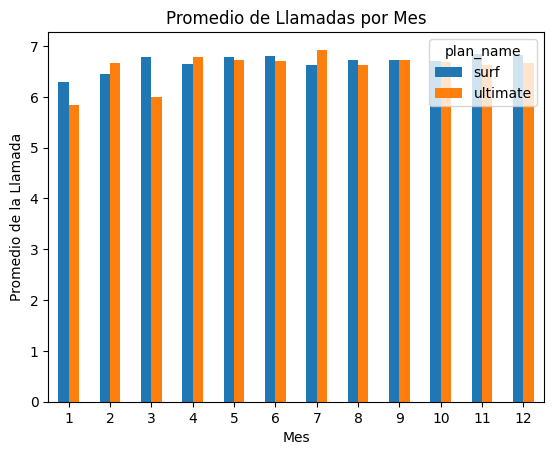

In [40]:
result_average_df = management_plans_df.groupby(['plan_name','month'])['average_call'].mean().unstack(level=0)

result_average_df.plot(kind='bar',
                       xlabel='Mes',
                       ylabel='Promedio de la Llamada',
                       title='Promedio de Llamadas por Mes',
                       rot=0)

In [41]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_data = management_plans_df[management_plans_df['plan_name'] == 'surf']['minutes']
ultimate_data = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['minutes']

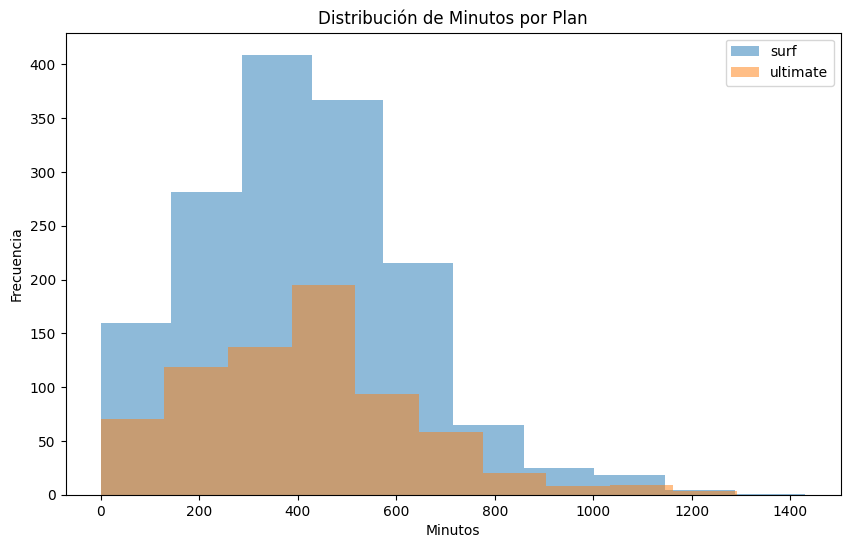

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(surf_data, alpha=0.5, label='surf')
plt.hist(ultimate_data, alpha=0.5, label='ultimate')

plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Minutos por Plan')
plt.legend()
plt.show()

In [43]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_call_surf = management_plans_df[management_plans_df['plan_name'] == 'surf']['average_call'].mean()
media_call_ultimate = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['average_call'].mean()
varianza_call_surf = management_plans_df[management_plans_df['plan_name'] == 'surf']['average_call'].var()
varianza_call_ultimate = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['average_call'].var()

print(f"Media de llamadas para el plan surf: {media_call_surf}")
print(f"Varianza de llamadas para el plan surf: {varianza_call_surf}")
print(f"Media de llamadas para el plan ultimate: {media_call_ultimate}")
print(f"Varianza de llamadas para el plan ultimate: {varianza_call_ultimate}")


Media de llamadas para el plan surf: 6.756733508523206
Varianza de llamadas para el plan surf: 1.2019120408692192
Media de llamadas para el plan ultimate: 6.678253305983586
Varianza de llamadas para el plan ultimate: 0.8777278469198699


<AxesSubplot:xlabel='average_call'>

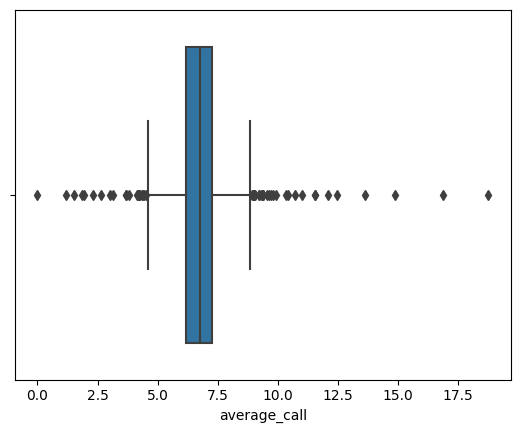

In [44]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
average_surf_data = management_plans_df[management_plans_df['plan_name'] == 'surf']['average_call']
average_ultimate_data = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['average_call']
sns.boxplot(average_surf_data)


<AxesSubplot:xlabel='average_call'>

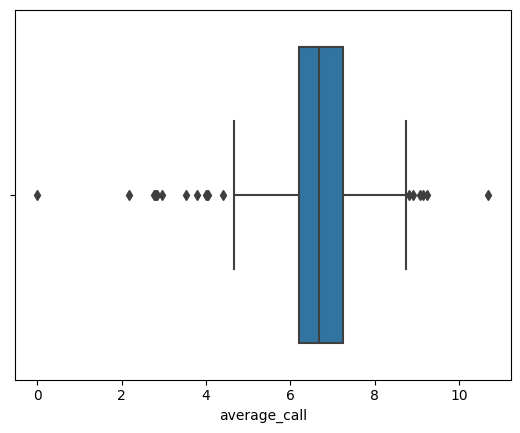

In [45]:
sns.boxplot(average_ultimate_data)

Su comportamiento varia de acuerdo al plan.

Tanto con el gráfico de barras, así como la media, podemos ver que en el plan **surf** es donde los clientes mantienen más tiempo en la llamada, a comparación del plan **ultimate**, de la misma manera vemos que en el gráfico de caja el plan **surf** tienen muchos datos atípicos, lo que nos muetra la variaza, que hay muchos datos lejos de nuestra media.

En el plan ultimate, tanto con el gráfico de barras, así como la media, podemos ver que los clientes se mantienen en menos tiempo en la llamada, en el gráfico de caja no tienen tantos datos atípicos, lo que nos muetra la variaza, que hay menos datos lejos de nuestra media.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buen análisis comparativo. Has utilizado adecuadamente diferentes representaciones gráficas para evaluar la duración promedio de llamadas entre planes, lo cual enriquece tu interpretación. Además, el uso de métricas como la media y la varianza aporta un respaldo cuantitativo a tus observaciones, lo que demuestra un enfoque analítico sólido. </div>

### Mensajes

<AxesSubplot:title={'center':'Mensajes Promedio Por Mes'}, xlabel='Mes', ylabel='Promedio de Mensajes'>

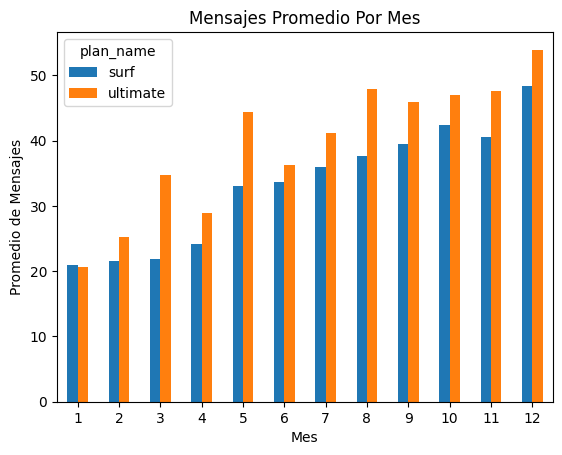

In [46]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
message_plan_df = management_plans_df.groupby(['plan_name','month'])['number_message'].mean().unstack(level=0)
message_plan_df.plot(kind='bar',
                       xlabel='Mes',
                       ylabel='Promedio de Mensajes',
                       title='Mensajes Promedio Por Mes',
                       rot=0)


In [47]:
surf_message = management_plans_df[management_plans_df['plan_name'] == 'surf']['number_message']
ultimate_message = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['number_message']

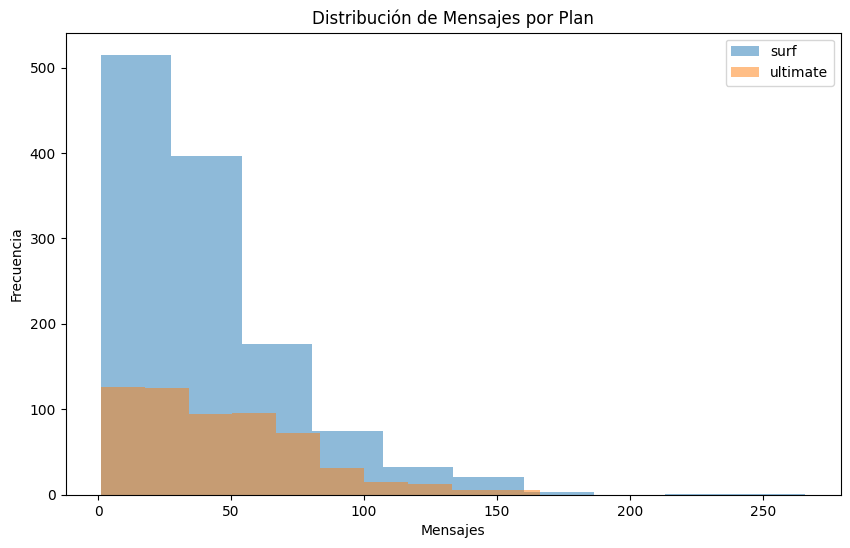

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(surf_message, alpha=0.5, label='surf')
plt.hist(ultimate_message, alpha=0.5, label='ultimate')

plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Mensajes por Plan')
plt.legend()
plt.show()

In [49]:
media_message_surf = management_plans_df[management_plans_df['plan_name'] == 'surf']['number_message'].mean()
media_message_ultimate = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['number_message'].mean()
varianza_message_surf = management_plans_df[management_plans_df['plan_name'] == 'surf']['number_message'].var()
varianza_message_ultimate = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['number_message'].var()

print(f"Media de mensajes para el plan surf: {media_message_surf}")
print(f"Varianza de mensajes para el plan surf: {varianza_message_surf}")
print(f"Media de mensajes para el plan ultimate: {media_message_ultimate}")
print(f"Varianza de mensajes para el plan ultimate: {varianza_message_ultimate}")

Media de mensajes para el plan surf: 40.10965630114566
Varianza de mensajes para el plan surf: 1091.3442310038054
Media de mensajes para el plan ultimate: 46.29623287671233
Varianza de mensajes para el plan ultimate: 1085.183107568317


<AxesSubplot:xlabel='number_message'>

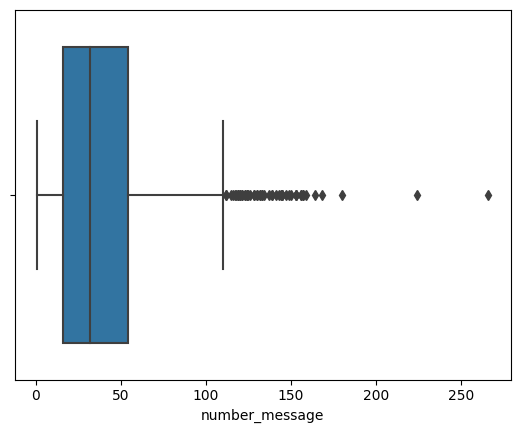

In [50]:
average_surf_message = management_plans_df[management_plans_df['plan_name'] == 'surf']['number_message']
average_ultimate_message = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['number_message']
sns.boxplot(average_surf_message)

<AxesSubplot:xlabel='number_message'>

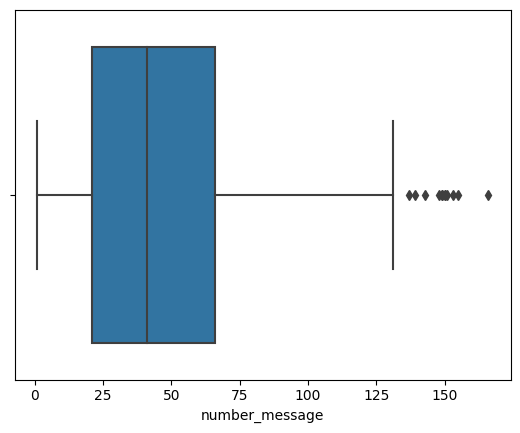

In [51]:
sns.boxplot(average_ultimate_message)

Su comportamiento varia de acuerdo al plan.

En el gráfico de barras, muestra que en el plan ultimate es donde más mensaje en promedio se envian al mes. Mas sin embargo la variaza de ambos planes es alta, lo que sugiere que la media, por sí sola, no es una representación muy precisa de todos los usuarios. Hay una amplia gama de comportamientos en cuanto al envío de mensajes, que es lo que podemos ver en los gráficos de cajas, cuantos valores atípicos poseemos.

### Internet

<AxesSubplot:title={'center':'GB Promedio Por Mes'}, xlabel='Mes', ylabel='Promedio de GB'>

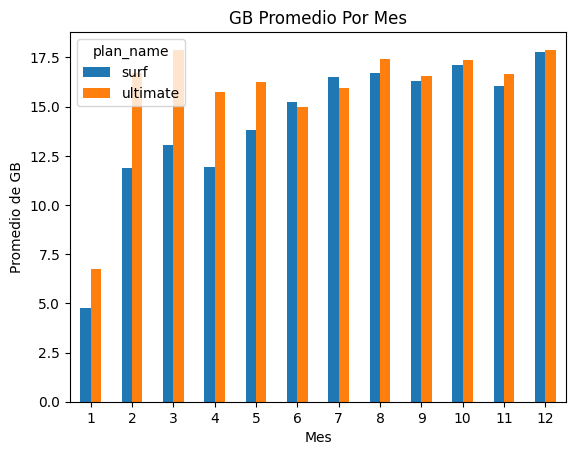

In [52]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
trafic_plan_df = management_plans_df.groupby(['plan_name','month'])['gb'].mean().unstack(level=0)
trafic_plan_df.plot(kind='bar',
                       xlabel='Mes',
                       ylabel='Promedio de GB',
                       title='GB Promedio Por Mes',
                       rot=0)

In [53]:
surf_trafic = management_plans_df[management_plans_df['plan_name'] == 'surf']['gb']
ultimate_trafic = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['gb']

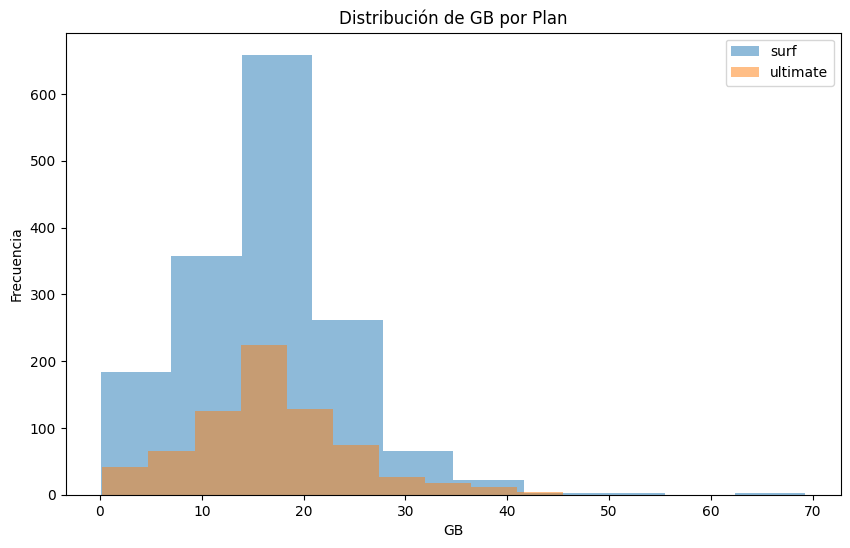

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(surf_trafic, alpha=0.5, label='surf')
plt.hist(ultimate_trafic, alpha=0.5, label='ultimate')

plt.xlabel('GB')
plt.ylabel('Frecuencia')
plt.title('Distribución de GB por Plan')
plt.legend()
plt.show()

In [55]:
media_trafic_surf = management_plans_df[management_plans_df['plan_name'] == 'surf']['gb'].mean()
media_trafic_ultimate = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['gb'].mean()
varianza_trafic_surf = management_plans_df[management_plans_df['plan_name'] == 'surf']['gb'].var()
varianza_trafic_ultimate = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['gb'].var()

print(f"Media de GB para el plan surf: {media_trafic_surf}")
print(f"Varianza de GB para el plan surf: {varianza_trafic_surf}")
print(f"Media de GB para el plan ultimate: {media_trafic_ultimate}")
print(f"Varianza de GB para el plan ultimate: {varianza_trafic_ultimate}")

Media de GB para el plan surf: 16.325880993511312
Varianza de GB para el plan surf: 59.28824019139141
Media de GB para el plan ultimate: 16.834611575321627
Varianza de GB para el plan ultimate: 58.48393247695561


<AxesSubplot:xlabel='gb'>

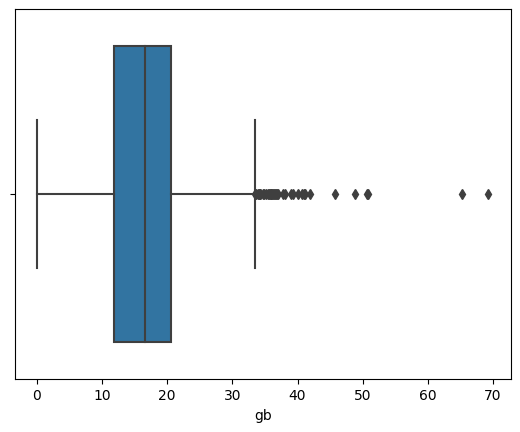

In [56]:
average_surf_trafic = management_plans_df[management_plans_df['plan_name'] == 'surf']['gb']
average_ultimate_trafic = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['gb']
sns.boxplot(average_surf_trafic)

<AxesSubplot:xlabel='gb'>

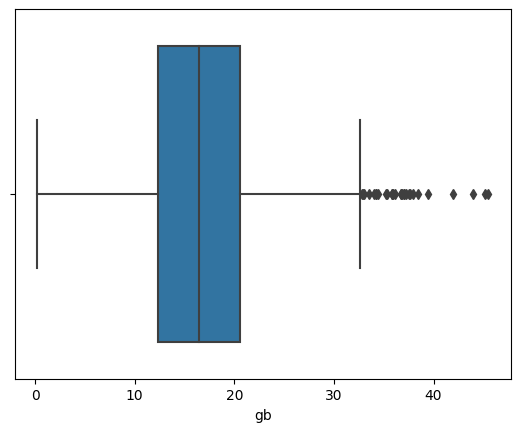

In [57]:
sns.boxplot(average_ultimate_trafic)

El comportamiento va muy de la mano.

Vemos tanto una media como una variaza similares en ambos planes, similitud en el gráfico de cajas. A diferencia de la gráfica de barras que los primeros meses **ultimate** tiene un mayor tráfico, que el plan **surf**

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente análisis comparativo en los apartados de mensajes y consumo de internet. Utilizaste múltiples formas de visualización y métricas descriptivas para explorar el comportamiento de los usuarios por plan. Identificaste correctamente patrones como la alta variabilidad en el envío de mensajes y el uso de datos bastante similar entre planes. Esto demuestra una capacidad sólida para interpretar resultados en función del contexto del negocio. </div>

## Ingreso

<AxesSubplot:title={'center':'Ingresos Promedio Por Mes'}, xlabel='Mes', ylabel='Promedio de Ingresos'>

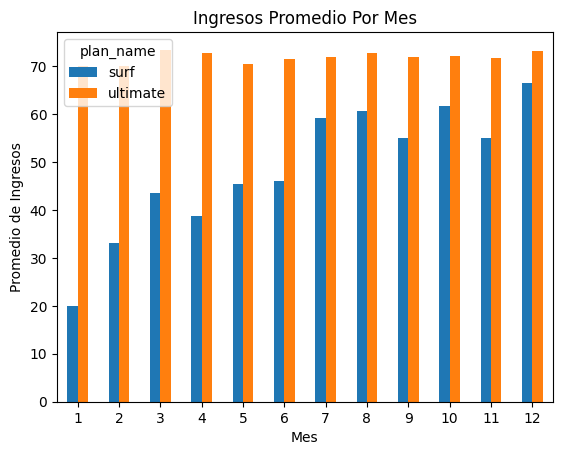

In [58]:
income_plan_df = management_plans_df.groupby(['plan_name','month'])['monthly_income'].mean().unstack(level=0)
income_plan_df.plot(kind='bar',
                       xlabel='Mes',
                       ylabel='Promedio de Ingresos',
                       title='Ingresos Promedio Por Mes',
                       rot=0)

In [59]:
surf_income = management_plans_df[management_plans_df['plan_name'] == 'surf']['monthly_income']
ultimate_income = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['monthly_income']

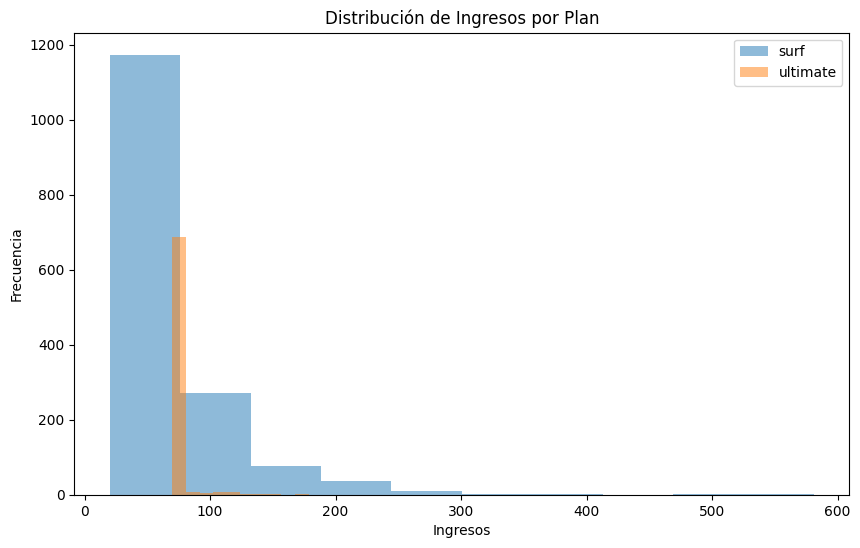

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(surf_income, alpha=0.5, label='surf')
plt.hist(ultimate_income, alpha=0.5, label='ultimate')

plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos por Plan')
plt.legend()
plt.show()

In [61]:
media_income_surf = management_plans_df[management_plans_df['plan_name'] == 'surf']['monthly_income'].mean()
media_income_ultimate = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['monthly_income'].mean()
varianza_income_surf = management_plans_df[management_plans_df['plan_name'] == 'surf']['monthly_income'].var()
varianza_income_ultimate = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['monthly_income'].var()

print(f"Media de Ingresos para el plan surf: {media_income_surf}")
print(f"Varianza de Ingresos para el plan surf: {varianza_income_surf}")
print(f"Media de Ingresos para el plan ultimate: {media_income_ultimate}")
print(f"Varianza de Ingresos para el plan ultimate: {varianza_income_ultimate}")

Media de Ingresos para el plan surf: 57.29378406756595
Varianza de Ingresos para el plan surf: 2887.54497103938
Media de Ingresos para el plan ultimate: 72.11607964409723
Varianza de Ingresos para el plan ultimate: 115.96808058212822


<AxesSubplot:xlabel='monthly_income'>

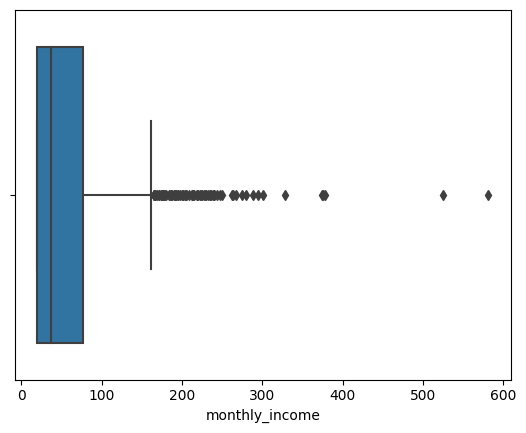

In [62]:
average_surf_income = management_plans_df[management_plans_df['plan_name'] == 'surf']['monthly_income']
average_ultimate_income = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['monthly_income']
sns.boxplot(average_surf_income)

<AxesSubplot:xlabel='monthly_income'>

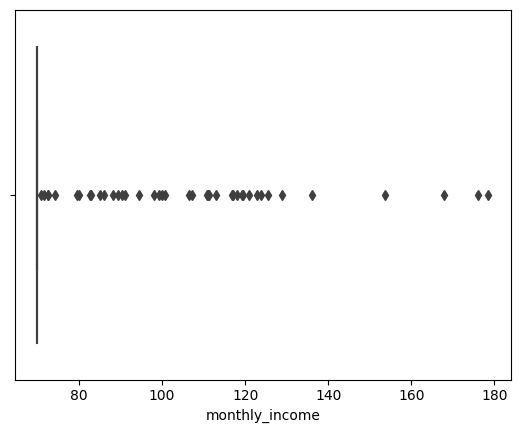

In [63]:
sns.boxplot(average_ultimate_income)

Dentro de los ingresos podemos ver un comportamiento totalmente diferente, ya que vemos que los que tiene el plan ultimate, si bien es más costoso su pago mensual, los usuarios no tienden a acudir a costos adicionales, ya que su plan por el valor que pagan cubre sus necesidades, lo que no pasa con el plan surf, ya que vemos que los costos adicionales al plan suben en los meses.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buen análisis. Has identificado claramente la diferencia clave entre ambos planes: mientras que **Ultimate** genera ingresos más estables gracias a su tarifa fija más alta, **Surf** depende más de ingresos variables por consumo adicional. Este tipo de observación es esencial para decisiones estratégicas de negocio, y lo sustentaste correctamente con estadísticas y visualizaciones. </div>

## Prueba las hipótesis estadísticas

In [64]:
# Prueba las hipótesis
surf_income = management_plans_df[management_plans_df['plan_name'] == 'surf']['monthly_income']
ultimate_income = management_plans_df[management_plans_df['plan_name'] == 'ultimate']['monthly_income']
resultado_prueba_t = st.ttest_ind(surf_income, ultimate_income)
pvalue = resultado_prueba_t.pvalue  
alpha = 0.05
print(f'Valor p:', pvalue)

if pvalue > alpha:
    print('No hay suficiente evidencia para rechazar la hipótesis nula.')
else:
    print('Hay suficiente evidencia para rechazar la hipótesis nula.')


Valor p: 3.0940054419190563e-13
Hay suficiente evidencia para rechazar la hipótesis nula.


In [65]:
print(surf_income.mean())
print(ultimate_income.mean())

57.29378406756595
72.11607964409723


Rechazamos la hipótesis nula de que el comportamiento de los ingresos de las 2 poblaciones sean iguales, debido a que el Pvalue es pequeña. Lo que concluimos al ser tan pequeña, es que las mismas son diferentes. Utilizamos en test de **Hipótesis sobre la igualdad de las medias con 2 poblaciones independientes, (st.ttest_ind)**

In [66]:
city_plans_df = management_plans_df.merge(df_users[['user_id', 'city']], on='user_id', how='left')
city_plans_df.head(10)

,user_id,month,numer_calls,minutes,number_message,gb,plan_name,messages_included,mb_per_month_included,minutes_included,...,gb_per_month_included,additional_minutes,additional_sms,additional_gb,cost_additional_minutes,cost_additional_sms,cost_additional_gb,monthly_income,average_call,city
0,1000,12,16.0,116.83,11.0,1.856904,ultimate,1000,30720,3000,...,30.0,0.0,0.0,0.000000,0.00,0.00,0.000000,70.000000,7.301875,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,171.14,30.0,6.756982,surf,50,15360,500,...,15.0,0.0,0.0,0.000000,0.00,0.00,0.000000,20.000000,6.338519,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,297.69,44.0,13.002754,surf,50,15360,500,...,15.0,0.0,0.0,0.000000,0.00,0.00,0.000000,20.000000,6.075306,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,374.11,53.0,21.807119,surf,50,15360,500,...,15.0,0.0,3.0,6.807119,0.00,0.09,68.071191,88.161191,5.755538,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,404.59,36.0,18.070605,surf,50,15360,500,...,15.0,0.0,0.0,3.070605,0.00,0.00,30.706055,50.706055,6.321719,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,12,56.0,392.93,44.0,18.915215,surf,50,15360,500,...,15.0,0.0,0.0,3.915215,0.00,0.00,39.152148,59.152148,7.016607,"Seattle-Tacoma-Bellevue, WA MSA"
6,1002,10,11.0,54.13,15.0,6.398447,surf,50,15360,500,...,15.0,0.0,0.0,0.000000,0.00,0.00,0.000000,20.000000,4.920909,"Las Vegas-Henderson-Paradise, NV MSA"
7,1002,11,55.0,359.76,32.0,18.891680,surf,50,15360,500,...,15.0,0.0,0.0,3.891680,0.00,0.00,38.916797,58.916797,6.541091,"Las Vegas-Henderson-Paradise, NV MSA"
8,1002,12,47.0,363.24,41.0,14.058828,surf,50,15360,500,...,15.0,0.0,0.0,0.000000,0.00,0.00,0.000000,20.000000,7.728511,"Las Vegas-Henderson-Paradise, NV MSA"
9,1003,12,149.0,1041.00,50.0,26.410293,surf,50,15360,500,...,15.0,541.0,0.0,11.410293,16.23,0.00,114.102930,150.332930,6.986577,"Tulsa, OK MSA"


In [67]:
city_income_df = city_plans_df.groupby('city')['monthly_income'].mean().reset_index(name='average_income')
city_income_df.head()

,city,average_income
0,"Albany-Schenectady-Troy, NY MSA",140.841102
1,"Albuquerque, NM MSA",63.234630
2,"Atlanta-Sandy Springs-Roswell, GA MSA",73.074401
3,"Austin-Round Rock-Georgetown, TX MSA",53.102176
4,"Bakersfield, CA MSA",48.214673


In [71]:
ny_income = city_income_df[city_income_df['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['average_income']
otras_income = city_income_df[city_income_df['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['average_income']
resultado_prueba_t = st.ttest_ind(ny_income, otras_income)
pvalue = resultado_prueba_t.pvalue
alpha = 0.05
print(f"Valor p: {pvalue}")

if pvalue > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Hay suficiente evidencia para rechazar la hipótesis nula.")

Valor p: nan
Hay suficiente evidencia para rechazar la hipótesis nula.


/tmp/ipykernel_124/1855663518.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  resultado_prueba_t = st.ttest_ind(ny_income, otras_income)


**IMPORTANTE 
En el caso de este código he aumentado una imagen de que el codigo si funciona y se genera de manera correcta, pero lo que me dicen es que es un problema del servidor de jupyter. Sin embargo mando evidencia que este código si corre de maner correcta. NO he tenido respuesta de soprte tecnico para solucionar el problema**

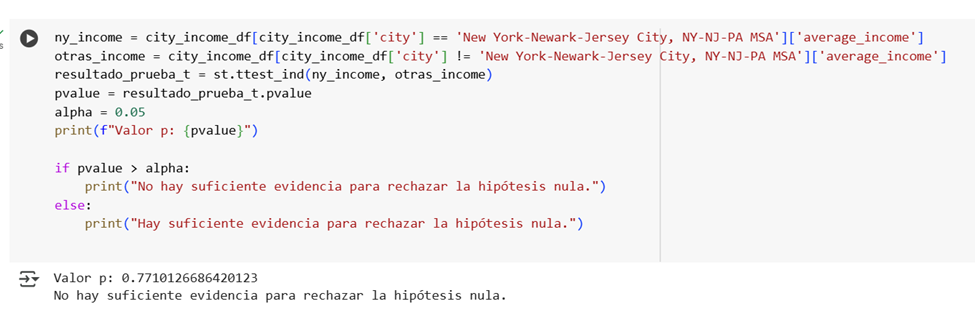

In [70]:
print('NY',ny_income.mean())
print('Otras', otras_income.mean())

NY 57.19048435842171
Otras 63.567186068416305


Rechazamos la hipótesis nula, de que el comportamiento de los ingresos de NY versus las otras ciudades sean iguales, debido a que el Pvalue es casi cercana a 1. Lo que concluimos, es que las mismas no son iguales, sin embargo con este test no podemos decir cateogóricamente que su comportamiento es diferente. Utilizamos en test de **Hipótesis sobre la igualdad de las medias con 2 poblaciones independientes, (st.ttest_ind)**

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy bien planteadas y ejecutadas las pruebas de hipótesis. Aplicaste correctamente el test de comparación de medias (`ttest_ind`) para evaluar diferencias en ingresos entre planes y entre regiones. Además, interpretaste adecuadamente el valor p y lo contextualizaste con los resultados medios, demostrando comprensión tanto estadística como del impacto en el negocio. </div>

## Conclusión general

Para iniciar el tomar la desición de utilizar el metodo **(.info)** y ver los datos de manera aleatoria con el método **(.sample)** permitió conocer como estaba la data, el tipo, si había valores ausentes, la cantidad con la que estaba conformada cada tabla, y el ver aleatoriamente en este monento permitió que pueda ver más allá de los primeros datos y conocer como estaba la calidad de los mismo. 

El ver todas las tablas ayudó a ir intuiyendo que debería cambiar  o arrgelar para futuroa análisis, así como, ir incluyendo campos que en los análisis se podrían necesitar. El pasar el formato de fecha de tipo **objet** a tipo **datetime** era clave, si bien a simple vista podríamos haber concluido que estaba bien el formato, el tener el tipo nos permitió reconocer la corrección que había que hacer. Así mismo, aumentar nuevas columnas con el mes o con cálculos adicionales nos permitirían tener en los siguientes pasos columnas ya construidas claves en para distintos momentos. 

Una vez que se tenía la data corregida, aumentada los columnas necesarias, se pudo ya ir haciendo visualizaciones de cálculos adicionales en diferentes aspectos, viendo el número de mensajes por mes, de minutos, lo GB etc., en donde su utilizó el método **(.groupby)** y al unir todas estas nuevas tablas, ya nos dió un vistaso del comportamiento de los usuarios. En esta etapa era importante poder ver los primeros datos, para lo que aquí usamos el metodo **(.head)** ya que teníamos que visualmente ir viendo al mismo usuario como se hiba haciendo su comportamiento en los distintos nuevos DataFrames.

 Su postrior unificación con los datos de los planes, ya nos permitió cuantificar en costo, lo que implicaba el uso de los mensajes, minutos y gigas, e importantísimo sumar su valor total de los planes mensuales, y con esta data, el elaborar los gráficos de barra, histogramas, nos permite visualmente ir councluyendo como el **Plan Ultimate** a la larga, puede ser mejor, si bien es cierto el costo mensual es sumamente alto, los usuarios no se ven atrapados en pagar más de su plan, lo que no ocurre con el **Plan Surf**, pues sus usuarios constantemente, por no decir siempre incurren a pagar costos adicionales por el plan limitado que poseen. 
 
 La prueba de hipótesis que se utilizó **(test.ind)** que es para comparar poblaciones independientes, nos permitió ir concluyendo sobre el rechazo de la hipótesis nula, de que las poblaciones sean iguales, si bien es cierto el pvalue en un caso es más grande y en el otro, nos permite determinar si categoricamente se rechaza la hipótessis nula.

# Comentario general del revisor 

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
¡Felicidades María! Tu proyecto está **aprobado**. Has demostrado un dominio sólido en el análisis exploratorio, enriquecimiento de datos, visualización y validación estadística, aplicando cada técnica de forma justificada y coherente con los objetivos del análisis. El enfoque paso a paso fue riguroso y bien estructurado, con una narrativa clara que conecta la transformación de datos con los hallazgos obtenidos.  

**Puntos Positivos:**
   
- **Procesamiento de datos:** Excelente uso de `.info()`, `.sample()` y conversiones `datetime`, mostrando atención al detalle y limpieza estructurada.  
- **Visualización y análisis gráfico:** Buenos gráficos de barras, histogramas y diagramas de caja que complementan tu análisis con claridad.  
- **Análisis estadístico:** Aplicaste correctamente pruebas de hipótesis (`ttest_ind`) y supiste interpretar los valores p de forma contextual.  
- **Narrativa analítica:** Muy buena justificación en cada paso, desde la limpieza hasta las conclusiones estratégicas por tipo de plan.  

**Áreas para Seguir Investigando:**
    
- **Segmentación avanzada de usuarios:** Clasificación por perfil de uso para entender comportamientos por grupos.  
- **Modelos predictivos de churn o consumo:** Podrías usar estos datos para predecir abandono o recomendar cambios de plan.  
- **Optimización de tarifas:** Aplicar modelos de simulación para proponer planes personalizados o reajustes de precios.  
- **Visualizaciones interactivas:** Explorar librerías como `plotly` o `dash` para enriquecer la experiencia del análisis.  

¡Sigue así! Este tipo de trabajo detallado y bien justificado te posiciona muy bien para proyectos más complejos y análisis estratégicos.  
</div>